In [3]:
import pandas as pd
from matplotlib.pylab import plt
import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

In [4]:
df = pd.read_csv("../WELFake_Dataset_processed.csv")

In [5]:
#Removing all of the NaN values
df.head(5)

,Unnamed: 0,title,text,label,all
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,1,NaN,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?
2,2,UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,4,SATAN : Russia unvelis an image of its terrify...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN : Russia unvelis an image of its terrify...


In [6]:
print(f'Ratio of news')
print(df.label.value_counts(normalize = True).rename({1:'Reliable',0:'Fake'}))

Ratio of news
Reliable    0.514404
Fake        0.485596
Name: label, dtype: float64


In [7]:
df = df.drop(['Unnamed: 0'],axis = 1)
df = df.fillna(' ')
df.head()

,title,text,label,all
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?
2,UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMAS ATTORNEY GENERAL SAYS MOS...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN : Russia unvelis an image of its terrify...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN : Russia unvelis an image of its terrify...


In [8]:
df["all"] = df['title'] + df['text']
df["length"] = df["all"].apply(lambda x : len(x) - x.count(" "))

In [9]:
fake_lengths = df[df["label"] == 1]["length"]
real_lengths = df[df['label'] == 0]["length"]

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  1.,  5., 12.,  8., 10.,  8.,  7., 11., 15., 19., 17., 21.,
        22., 13., 15.,  7.,  9.,  4.,  9.,  2.,  3.,  6.,  3.,  4.,  3.]),
 array([  0.        ,   5.12820513,  10.25641026,  15.38461538,
         20.51282051,  25.64102564,  30.76923077,  35.8974359 ,
         41.02564103,  46.15384615,  51.28205128,  56.41025641,
         61.53846154,  66.66666667,  71.79487179,  76.92307692,
         82.05128205,  87.17948718,  92.30769231,  97.43589744,
        102.56410256, 107.69230769, 112.82051282, 117.94871795,
        123.07692308, 128.20512821, 133.33333333, 138.46153846,
        143.58974359, 148.71794872, 153.84615385, 158.97435897,
        164.1025641 , 169.23076923, 174.35897436, 179.48717949,
        184.61538462, 189.74358974, 194.87179487, 200.        ]),
 <BarContainer object of 39 artists>)

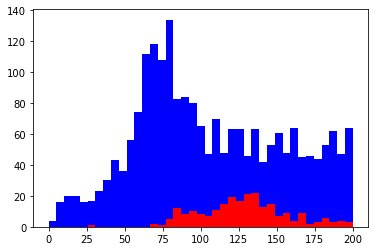

In [10]:
bins = np.linspace(0, 200, 40)
plt.hist(fake_lengths,bins,label = 'Fake',color = 'blue')
plt.hist(real_lengths,bins,label = 'Reliable',color = 'red')

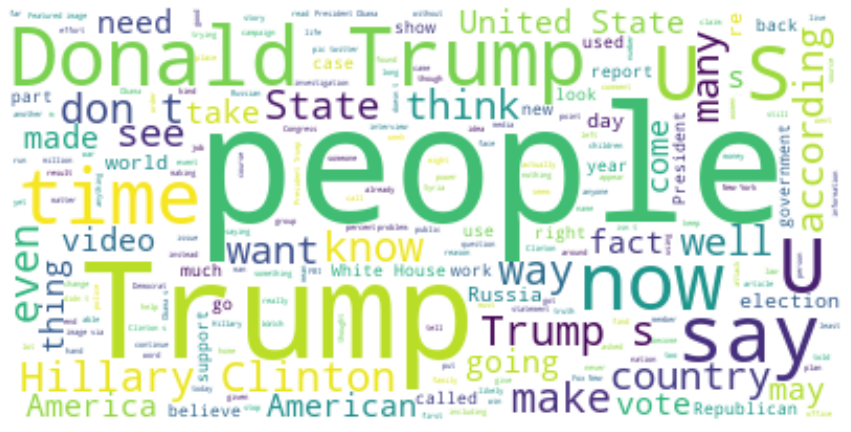

In [11]:
#Reliable news word cloud
text = " ".join(sentence for sentence in df[df['label'] == 1]['all'])
stopwords = set(STOPWORDS)
st = set(['said','one','will'])
stopwords = stopwords.union(st)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

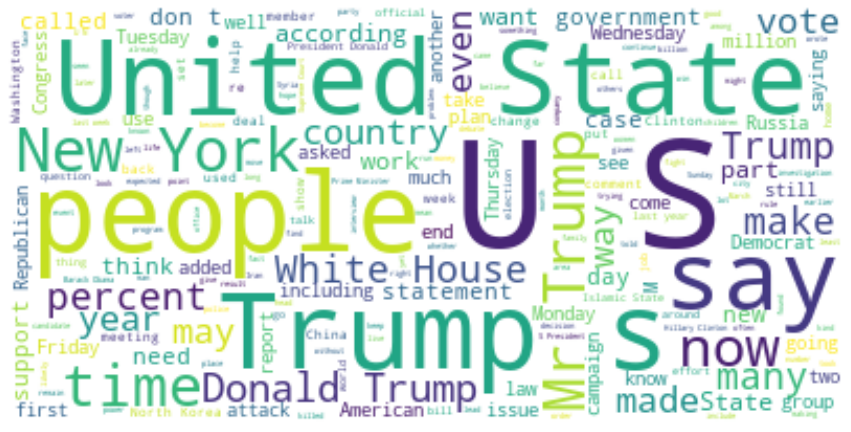

In [12]:
#Fake news word cloud
text = " ".join(sentence for sentence in df[df['label'] == 0]['all'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
#Splitting training and testing data
train_labels = df['label']
x_train,x_test,y_train,y_test = train_test_split(df["all"],train_labels,test_size = 0.2)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english', max_df = 0.7)
tfidf_train = tfidf.fit_transform(x_train) 
tfidf_test = tfidf.transform(x_test)
y_test.shape
print(tfidf_train)

  (0, 3343)	0.05850569560390447
  (0, 1495)	0.06159376010723953
  (0, 104719)	0.057079177260665886
  (0, 106432)	0.1761572001016773
  (0, 106800)	0.09511884209200822
  (0, 88309)	0.1761572001016773
  (0, 95652)	0.06024397425533051
  (0, 216466)	0.04769242359767178
  (0, 153633)	0.0656108285272116
  (0, 56634)	0.04858981108541938
  (0, 61787)	0.03821852542400324
  (0, 10738)	0.10087634272091539
  (0, 99811)	0.1019231354352395
  (0, 26284)	0.07324359629159294
  (0, 85538)	0.04774940426748046
  (0, 97149)	0.19760998427110082
  (0, 170104)	0.049430825828969495
  (0, 43417)	0.05728016728968469
  (0, 36974)	0.05526463368583516
  (0, 78489)	0.05729573564214364
  (0, 54829)	0.055659402387377516
  (0, 115353)	0.046978026960245604
  (0, 222451)	0.03452223027791922
  (0, 29389)	0.09310847214524724
  (0, 39795)	0.08994738360952205
  :	:
  (57705, 46904)	0.41713819375591155
  (57705, 184623)	0.2776453234881052
  (57705, 160313)	0.12685128301814474
  (57705, 95796)	0.0921213855827043
  (57705, 51485

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(tfidf_train, y_train)
tfidf_train = selector.transform(tfidf_train).toarray()
tfidf_test = selector.transform(tfidf_test).toarray()

from sklearn.naive_bayes import GaussianNB
from time import time
t0 = time()
model = GaussianNB()
model.fit(tfidf_train, y_train)
print("\nTraining time:", round(time()-t0, 3))
t0 = time()
score_train = model.score(tfidf_train, y_train)
print("Prediction time (train)", round(time()-t0, 3))
t0 = time()
score_test = model.score(tfidf_test, y_test)
print("Prediction time (test):", round(time()-t0, 3))
print("\n Train set score:", score_train)
print("Test set score:", score_test)